In [47]:
from matplotlib import pyplot
from autograd import grad
from autograd import numpy

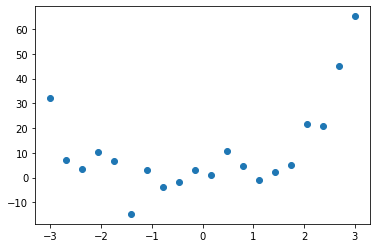

In [48]:
numpy.random.seed(0)
x = numpy.linspace(-3,3,20)
y = x**4 + x**3 - 4*x**2 + 8*numpy.random.normal(size=len(x))
pyplot.scatter(x,y)

In [49]:
degree = 3

def polynomial_features(x, degree):
    """ Generate polynomial features for x."""

    X = numpy.empty((len(x),degree+1))
    for i in range(degree+1):
        X[:,i] = x**i
    return X

X = polynomial_features(x,degree)
print(X.shape)

(20, 4)


In [50]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled[:,0] = 1

In [51]:
def linear_regression(params, X):
    '''
    The linear regression medel in matrix form.
    Arguments:
        params : 1D array of weights for the linear model
        X      : 2D array of input values
    Returns:
        1D array of predicted values
    '''
    return numpy.dot(X, params)

def mse_loss(params,model,X,y):
    '''
    The mean squared error loss function.
    Arguments:
        params: 1D array of weights for the linear model
        model : function for the linear regression model
        X     : 2D array of input values
        y     : 1D array of predicted values
    Returns:
        float, mean squared error
    '''
    
    y_pred = model(params,X)
    # print("***********************")
    # print(numpy.mean(numpy.sum((y-y_pred)**2)))
    # print("--------")
    # print(numpy.sum((y-y_pred)**2))
    # print("***********************")
    
    return numpy.mean(numpy.sum((y-y_pred)**2))

gradient = grad(mse_loss)

In [52]:
max_iter = 3000
alpha = 0.01
params = numpy.zeros(X_scaled.shape[1])
descent = numpy.ones(X_scaled.shape[1])
i = 0

from sklearn.metrics import mean_absolute_error

while numpy.linalg.norm(descent) > 0.01 and i < max_iter:
    descent = gradient(params,linear_regression,X_scaled,y)
    params = params - descent * alpha
    loss = mse_loss(params,linear_regression,X_scaled,y)
    mae = mean_absolute_error(y,X_scaled@params)
    if i%100 == 0:
        print("iteration {}, loss={},mae={}".format(i,loss,mae))
    i += 1

iteration 0, loss=5434.767518111348,mae=11.05718775676392
iteration 100, loss=1300.4768479787672,mae=6.885099348931476
iteration 200, loss=1281.308959359777,mae=6.8639053389713665
iteration 300, loss=1272.9896965024661,mae=6.807943451695349
iteration 400, loss=1267.4477500708404,mae=6.760476747247461
iteration 500, loss=1263.7497451381248,mae=6.721622404779564
iteration 600, loss=1261.282144135704,mae=6.689879731162117
iteration 700, loss=1259.6355657998567,mae=6.663949878547802
iteration 800, loss=1258.5368386500606,mae=6.642768513961068
iteration 900, loss=1257.8036810933152,mae=6.625466061127554
iteration 1000, loss=1257.314460450035,mae=6.611332180986304
iteration 1100, loss=1256.9880137870919,mae=6.5997866175015245
iteration 1200, loss=1256.7701827834117,mae=6.5903553760560865
iteration 1300, loss=1256.6248287285202,mae=6.582651263968432
iteration 1400, loss=1256.5278370197357,mae=6.576357994582585
iteration 1500, loss=1256.4631164890282,mae=6.571217202352118
iteration 1600, loss=

In [53]:
params

array([-22.51572398,   6.75930601,  41.30788709,  30.0105898 ])

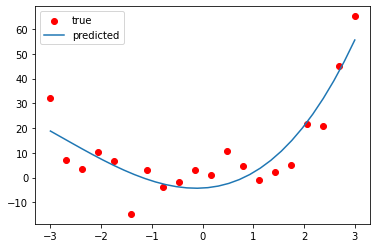

In [54]:
xgrid = numpy.linspace(x.min(),x.max(),30)
Xgrid_poly_feat = polynomial_features(xgrid,degree)
Xgrid_scaled = min_max_scaler.transform(Xgrid_poly_feat)
Xgrid_scaled[:,0] = 1
pyplot.scatter(x,y,c="r",label="true")
pyplot.plot(xgrid,Xgrid_scaled@params,label="predicted")
pyplot.legend();

In [55]:
from urllib.request import urlretrieve
URL = 'https://raw.githubusercontent.com/engineersCode/EngComp6_deeplearning/master/scripts/plot_helpers.py'
urlretrieve(URL,"plot_helpers.py")

('plot_helpers.py', <http.client.HTTPMessage at 0x2df54f9a188>)

In [56]:
from plot_helpers import interact_polyreg

max_degree = 15
interact_polyreg(max_degree,x,y)

interactive(children=(IntSlider(value=8, description='degree', max=15, min=1), Output()), _dom_classes=('widge…

In [ ]:
def regularized_loss(params,model,X,y,_lambda=1.0):
    '''
    The mean squared error loss function with an L2 penalty
    Arguments:
        params: 1D array of weights for the linear model
        model
    '''